<pre>데이터를 분석한 파일</pre>

- 데이터 준비하기

In [77]:
import pandas as pd
import numpy as np

In [78]:
df = pd.read_csv('data/movie_data_Name.csv')
df.head(1)

,title,budget,genres,country,charactor,director,vote_score,vote_count,vote_weight
0,토르: 러브 앤 썬더,250000000,"['액션', '모험', '판타지']",['United States of America'],Christian Bale,Taika Waititi,6.778,1802,5.482992


- 데이터 분석

In [206]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'text.color': "white",
                    'axes.labelcolor': "white",
                     'xtick.color': "white",
                     'ytick.color': "white"
                     })

<pre>복수개를 모두 담는다던 genres와 counrty는 대표 1개로만 정해서 데이터를 정하자</pre>

- 데이터 전처리

In [117]:
import ast
name = pd.read_csv('data/movie_data_Name.csv')
name.genres = name.genres.apply(lambda x: ast.literal_eval(str(x))[0])
name.country = name.country.apply(lambda x: ast.literal_eval(str(x))[0])
name.head(1)

,title,budget,genres,country,charactor,director,vote_score,vote_count,vote_weight
0,토르: 러브 앤 썬더,250000000,액션,United States of America,Christian Bale,Taika Waititi,6.778,1802,5.482992


In [118]:
# 국가 총 75개 + 한국
countryDictionary = {}
countryDictionary["Korea"] = 0
i = 1
for country in name.country.unique():
    countryDictionary[country] = i
    i += 1
print(countryDictionary)

{'Korea': 0, 'United States of America': 1, 'Australia': 2, 'Japan': 3, 'Mexico': 4, 'United Kingdom': 5, 'Canada': 6, 'Hong Kong': 7, 'France': 8, 'Austria': 9, 'South Korea': 10, 'Germany': 11, 'Spain': 12, 'Russia': 13, 'India': 14, 'China': 15, 'New Zealand': 16, 'Nigeria': 17, 'Finland': 18, 'Brazil': 19, 'Cyprus': 20, 'Bulgaria': 21, 'Czech Republic': 22, 'Malta': 23, 'Romania': 24, 'Italy': 25, 'Netherlands': 26, 'Belgium': 27, 'Indonesia': 28, 'United Arab Emirates': 29, 'Hungary': 30, 'Chile': 31, 'Thailand': 32, 'Sweden': 33, 'South Africa': 34, 'Portugal': 35, 'Luxembourg': 36, 'Denmark': 37, 'Panama': 38, 'Ireland': 39, 'Bahamas': 40, 'Colombia': 41, 'Dominican Republic': 42, 'Iceland': 43, 'Norway': 44, 'Argentina': 45, 'Switzerland': 46, 'Pakistan': 47, 'Bolivia': 48, 'Ukraine': 49, 'Iran': 50, 'Estonia': 51, 'Greece': 52, 'Poland': 53, 'Jamaica': 54, 'Malaysia': 55, 'Puerto Rico': 56, 'Venezuela': 57, 'Soviet Union': 58, 'Taiwan': 59, 'Uruguay': 60, 'Slovakia': 61, 'Sing

In [119]:
id = pd.read_csv('data/movie_data_ID.csv')
id.genres = id.genres.apply(lambda x: ast.literal_eval(str(x))[0])
id.country = name.country.apply(lambda x: countryDictionary[x])
id.head(1)

,title,budget,genres,country,charactor,director,vote_score,vote_count,vote_weight
0,616037,250000000,28,1,3894,55934,6.778,1802,5.482992


In [247]:
name.to_csv('data/movie_data_Name_One.csv', index=False)
id.to_csv('data/movie_data_ID_One.csv', index=False)

- 장르와 투표 가중치 분석

In [194]:
genres_vote_weight_max = []
for genre in name.genres.unique():
    genres_vote_weight_max.append([genre, name[name.genres == genre].vote_weight.max()])
genres_vote_weight_max = pd.DataFrame(genres_vote_weight_max, columns=['장르', 'vote_weight_max'])

In [242]:
genres_vote_weight_mean = []
for genre in name.genres.unique():
    genres_vote_weight_mean.append([genre, name[name.genres == genre].vote_weight.mean()])
genres_vote_weight_mean = pd.DataFrame(genres_vote_weight_mean, columns=['장르', 'vote_weight_mean'])

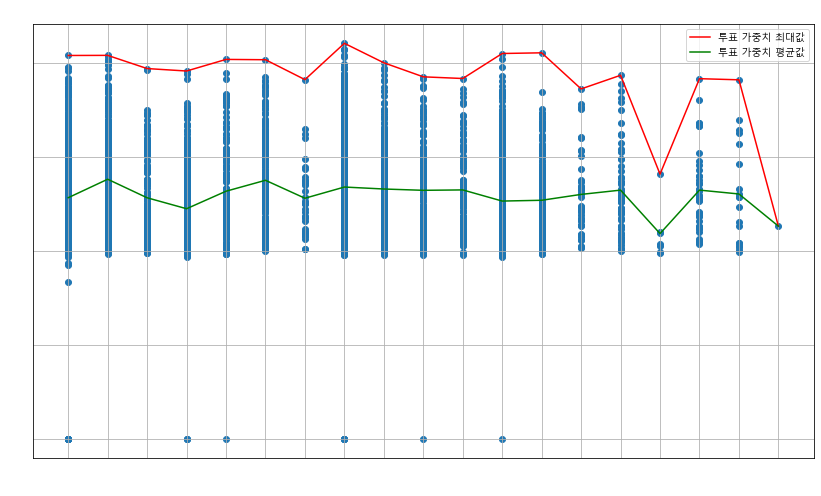

In [243]:
# 장르와 vote_weight와의 관계
plt.figure(figsize=(14, 8))
plt.title('장르와 vote_weight의 상관관계')
plt.scatter(name.genres, name.vote_weight)
plt.plot(genres_vote_weight_max['장르'], genres_vote_weight_max['vote_weight_max'], color='red', label='투표 가중치 최대값')
plt.plot(genres_vote_weight_mean['장르'], genres_vote_weight_mean['vote_weight_mean'], color='green', label='투표 가중치 평균값')
plt.ylabel('vote_weight')
plt.xlabel('장르')
plt.legend(labelcolor='black')
plt.grid()
plt.show()
# 결과 : 드라마가 가장 높은 투표가중치를 가지고 있고, TV 영화가 가장 낮은 가중치를 가지고 있다.

- 국가별과 투표 가중치 분석

In [217]:
country_vote_weight_max = []
for country in name.country.unique():
    country_vote_weight_max.append([country, name[name.country == country].vote_weight.max()])
country_vote_weight_max = pd.DataFrame(country_vote_weight_max, columns=['country', 'vote_weight_max'])

In [230]:
country_vote_weight_max.sort_values('vote_weight_max', ascending=False).head(2)

,country,vote_weight_max
0,United States of America,8.418481
4,United Kingdom,8.268492


In [222]:
country_vote_weight_mean = []
for country in name.country.unique():
    country_vote_weight_mean.append([country, name[name.country == country].vote_weight.mean()])
country_vote_weight_mean = pd.DataFrame(country_vote_weight_mean, columns=['country', 'vote_weight_mean'])

In [234]:
sorted_country_max = country_vote_weight_max.sort_values('vote_weight_max', ascending=False)
sorted_country_mean = country_vote_weight_mean.sort_values('vote_weight_mean', ascending=False)

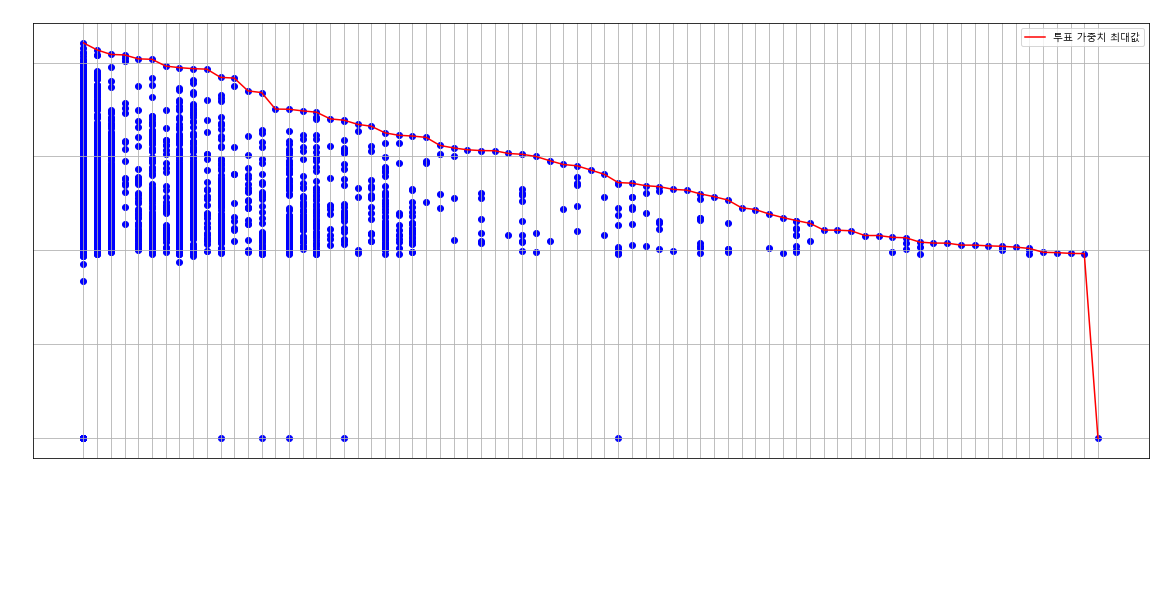

In [239]:
# 장르와 vote_weight와의 관계
plt.figure(figsize=(20, 8))
plt.title('장르와 vote_weight의 상관관계')
plt.plot(sorted_country_max['country'], sorted_country_max['vote_weight_max'], color='red', label='투표 가중치 최대값')
plt.scatter(name.country, name.vote_weight, color='blue')
plt.ylabel('vote_weight')
plt.xlabel('장르')
plt.legend(labelcolor='black')
plt.xticks(rotation=90)
plt.grid()
plt.show()
# 최대값 결과 : 미국, 영국, 독일, 뉴질랜드

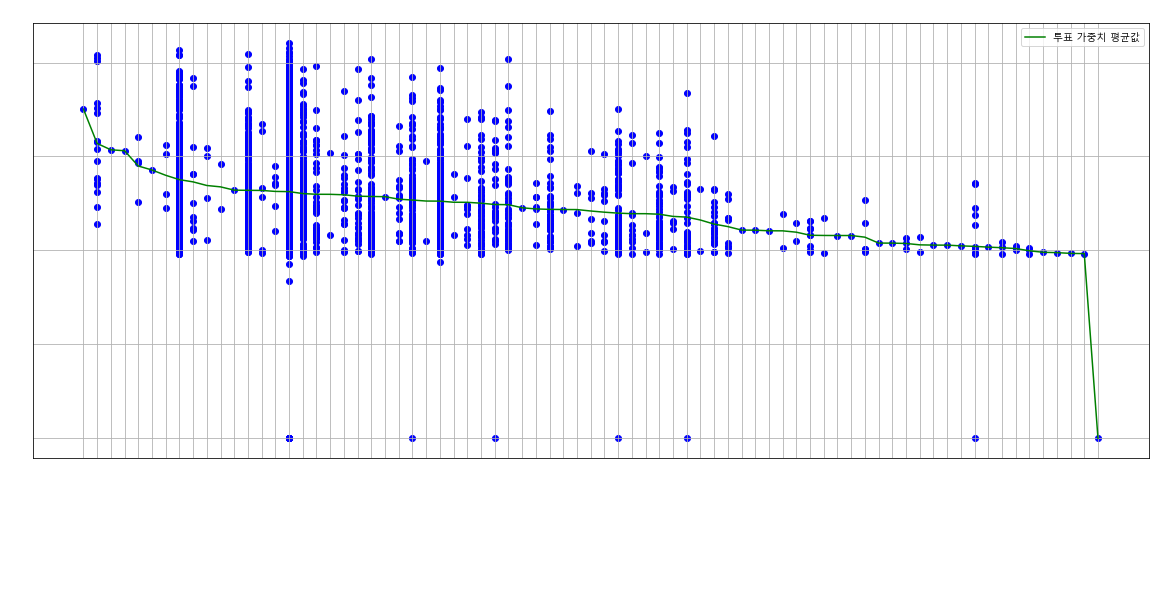

In [238]:
# 국가와 vote_weight와의 관계
plt.figure(figsize=(20, 8))
plt.title('국가와 vote_weight의 상관관계')
plt.plot(sorted_country_mean['country'], sorted_country_mean['vote_weight_mean'], color='green', label='투표 가중치 평균값')
plt.scatter(name.country, name.vote_weight, color='blue')
plt.ylabel('vote_weight')
plt.xlabel('장르')
plt.legend(labelcolor='black')
plt.xticks(rotation=90)
plt.grid()
plt.show()
# 평균결과 : 바하마, 뉴질랜드, 말타

- vote_weight(평가 가중치) 분석
<pre>평균: 5, 최소값: 0, 최대값 8.4</pre>

In [80]:
df.vote_weight.describe()

count    5128.000000
mean        5.206505
std         0.968314
min         0.000000
25%         4.480896
50%         5.058746
75%         5.795205
max         8.418481
Name: vote_weight, dtype: float64

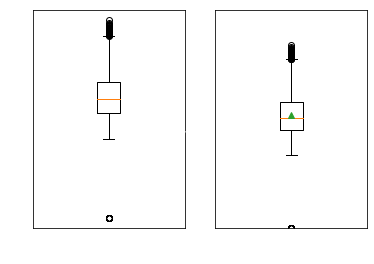

In [81]:
# BOXPLOT 중앙값 : 5.0
plt.subplot(1, 2, 1)
plt.boxplot(df.vote_weight)
plt.xlabel("Vote_weight")
plt.ylabel("Score")

plt.subplot(1, 2, 2)
plt.boxplot(df.vote_weight, showmeans=True)
plt.xlabel("Vote_weight_detail")
plt.ylabel("Score")
plt.ylim(0, 10)
plt.show()

<pre>따라서 결과값은 중앙값 기준인 약 5로 result를 0, 1로 나눈다.</pre>

- vote_weight와 genres HeatMap

In [82]:
import ast
# HeapMap : 결과값이 높을수록 두변수가 높은 상관관계를 갖고 있다는 것.
# genres 종류에 따라 나온 결과 값을 데이터프레임 변형, 해당하는 값만 부여하고 나머지는 0으로 부여
# 가중치 값은 반올림하여 정수형으로 바꿈.

In [244]:
genres_vote_weight_mean

,장르,vote_weight_mean
0,액션,5.130682
1,모험,5.524260
2,가족,5.129289
3,공포,4.896173
4,판타지,5.268963
5,애니메이션,5.501726
6,음악,5.119588
7,드라마,5.357867
8,범죄,5.316177
9,SF,5.288192


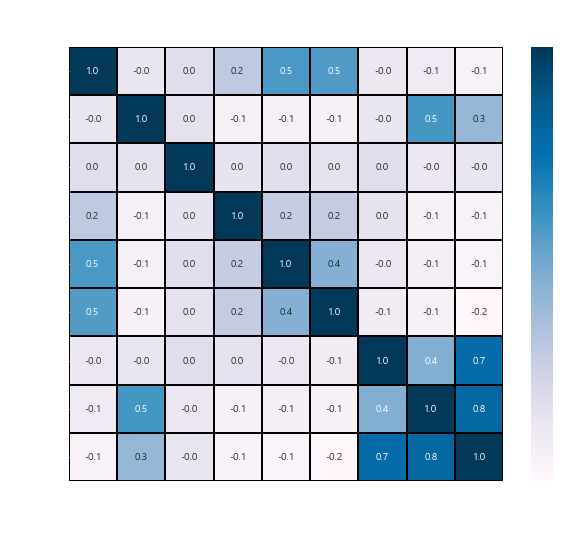

In [246]:
import seaborn as sns
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("columns of vote_weight", y = 1.05, size = 15)
sns.heatmap(id.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, fmt='.1f')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [113]:
df = pd.concat([pd.read_csv('data/movie_genres_data.csv'), pd.read_csv('data/movie_data_ID.csv')], axis=1)

In [115]:
df.drop(['title','genres', 'country', 'charactor', 'director', 'vote_score', 'vote_count'], axis=1, inplace=True)

- 장르와 투표 가중치 상관관계

<pre>TV 영화, 서부는 vote_weight와 큰 상관관계가 없다. 드라마는 높은 상관관계를 가지고 있다는 것을 알 수 있다.</pre>

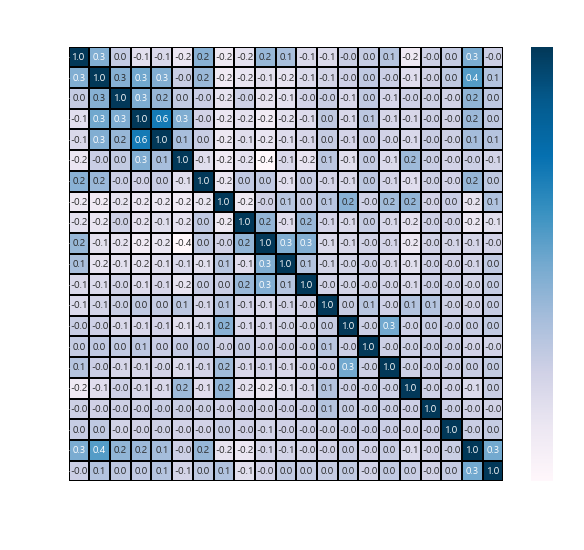

In [116]:
import seaborn as sns
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Genres of vote_weight", y = 1.05, size = 15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, fmt='.1f')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

<pre>vote_weight는 평균 5.2, 5.2보다 높은 투표 가중치는 대부분 vote_score이 4~8이다.
그보다 낮은 값은 0~5이다.</pre>

In [95]:
df.vote_score.describe()

count    5128.000000
mean        6.531422
std         0.933669
min         0.000000
25%         6.000000
50%         6.567000
75%         7.169000
max         8.725000
Name: vote_score, dtype: float64

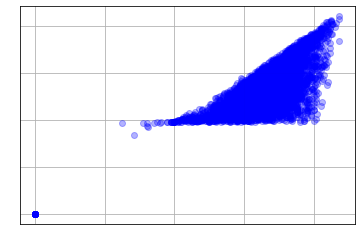

In [89]:
# 세로 : result, 세로 : vote_score
plt.plot(df.vote_score, df.vote_weight, 'bo', alpha=0.3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.show()

In [90]:
len(df.vote_score[df.vote_score == 0])

20

<pre>예산이 0~50000000 인경우 vote_weight가 4~8이다.
예산이 많을 수록 어느정도 높은 투표 가중치값을 얻는 것을 볼 수 있다.</pre>

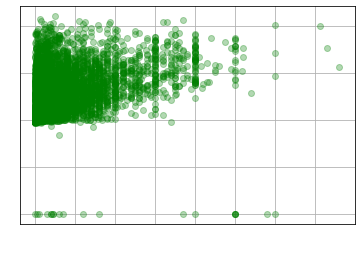

In [91]:
# 세로 : result, 세로 : vote_score
plt.plot(df.budget, df.vote_weight, 'go', alpha=0.3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid()
plt.show()

<pre>국가별</pre>

In [96]:
df.country.unique()

array(["['United States of America']",
       "['United States of America', 'Czech Republic']",
       "['Australia', 'United States of America']",
       "['Japan', 'United States of America']",
       "['Mexico', 'United States of America', 'Venezuela']",
       "['United Kingdom', 'United States of America']", "['Japan']",
       "['Canada', 'United States of America']",
       "['Hong Kong', 'United States of America']",
       "['France', 'United States of America']",
       "['France', 'Germany', 'United Kingdom', 'United States of America']",
       "['Austria', 'Germany']",
       "['United States of America', 'United Kingdom']",
       "['South Korea']",
       "['Canada', 'United Kingdom', 'United States of America']",
       "['Germany', 'Canada', 'Czech Republic', 'United States of America']",
       "['Spain', 'United States of America']", "['Russia']",
       "['Mexico', 'United States of America']",
       "['United Kingdom', 'United States of America', 'France']",
     